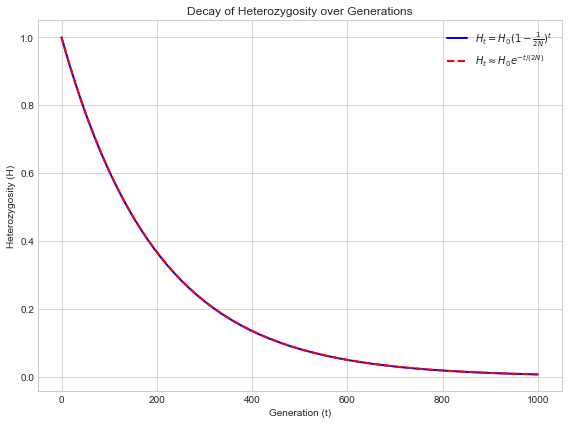

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

# パラメータ設定
H0 = 1.0
N = 100         # 集団サイズ（個体数 N の場合，実際は 2N アリルコピー）
t = np.arange(0, 1001, 1)   # 0～100世代

# 厳密な式と指数近似
H_exact = H0 * (1 - 1/(2 * N)) ** t
H_approx = H0 * np.exp(-t / (2 * N))

plt.figure(figsize=(8,6))
plt.plot(t, H_exact, 'b-', lw=2, label=r'$H_t = H_0 (1-\frac{1}{2N})^t$')
plt.plot(t, H_approx, 'r--', lw=2, label=r'$H_t \approx H_0 e^{-t/(2N)}$')
plt.xlabel("Generation (t)")
plt.ylabel("Heterozygosity (H)")
plt.title("Decay of Heterozygosity over Generations")
plt.legend()
plt.tight_layout()
plt.savefig('Heterozygosity_Decay.pdf', format='pdf')
plt.show()

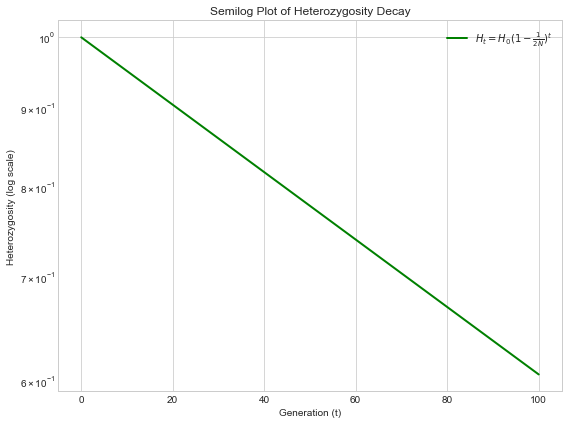

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

H0 = 1.0
N = 100
t = np.arange(0, 101, 1)

H_exact = H0 * (1 - 1/(2 * N)) ** t

plt.figure(figsize=(8,6))
plt.semilogy(t, H_exact, 'g-', lw=2, label=r'$H_t = H_0 (1-\frac{1}{2N})^t$')
plt.xlabel("Generation (t)")
plt.ylabel("Heterozygosity (log scale)")
plt.title("Semilog Plot of Heterozygosity Decay")
plt.legend()
plt.tight_layout()
plt.savefig('Heterozygosity_Semilog.pdf', format='pdf')
plt.show()

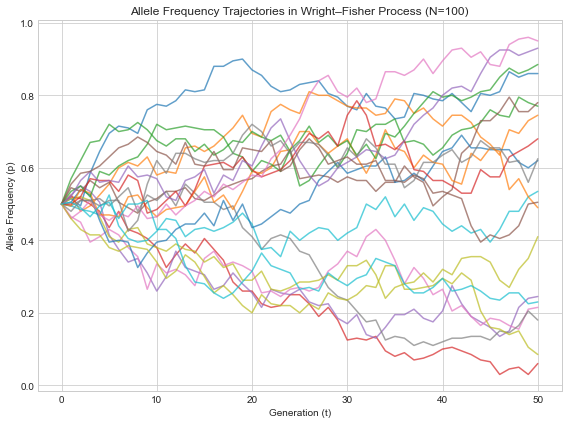

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

N = 100         # 個体数
n_alleles = 2 * N  # 総アリル数
p0 = 0.5        # 初期頻度
generations = 50
num_sim = 20    # シミュレーション回数

# 各世代ごとの allele frequency を記録するための配列
all_trajectories = np.zeros((num_sim, generations + 1))

for sim in range(num_sim):
    p = p0
    traj = [p]
    for t in range(generations):
        # 次世代の A allele 数は Binom(n_alleles, p)
        A_count = np.random.binomial(n_alleles, p)
        p = A_count / n_alleles
        traj.append(p)
    all_trajectories[sim, :] = traj

plt.figure(figsize=(8,6))
for traj in all_trajectories:
    plt.plot(traj, lw=1.5, alpha=0.7)
plt.xlabel("Generation (t)")
plt.ylabel("Allele Frequency (p)")
plt.title("Allele Frequency Trajectories in Wright–Fisher Process (N=100)")
plt.grid(True)
plt.tight_layout()
plt.savefig('WrightFisher_Trajectories.pdf', format='pdf')
plt.show()

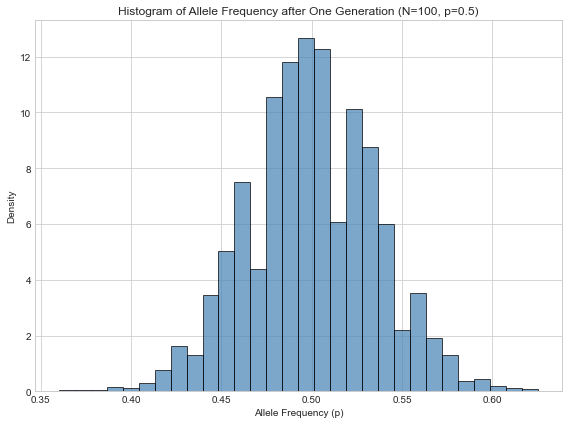

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

N = 100
n_alleles = 2 * N
p = 0.5
num_samples = 10000

# 二項分布に従う A allele 数をサンプリング
X_samples = np.random.binomial(n_alleles, p, size=num_samples)
p_samples = X_samples / n_alleles

plt.figure(figsize=(8,6))
plt.hist(p_samples, bins=30, density=True, color='steelblue', edgecolor='k', alpha=0.7)
plt.xlabel("Allele Frequency (p)")
plt.ylabel("Density")
plt.title("Histogram of Allele Frequency after One Generation (N=100, p=0.5)")
plt.tight_layout()
plt.savefig('AlleleFrequency_Histogram.pdf', format='pdf')
plt.show()

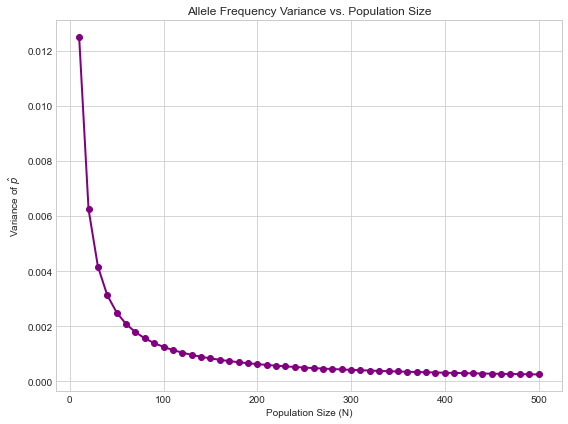

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

p = 0.5
N_values = np.arange(10, 501, 10)
variance_theory = p * (1 - p) / (2 * N_values)

plt.figure(figsize=(8,6))
plt.plot(N_values, variance_theory, 'o-', lw=2, color='purple')
plt.xlabel("Population Size (N)")
plt.ylabel(r"Variance of $\hat{p}$")
plt.title("Allele Frequency Variance vs. Population Size")
plt.grid(True)
plt.tight_layout()
plt.savefig('AlleleFrequency_Variance_vs_N.pdf', format='pdf')
plt.show()